<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

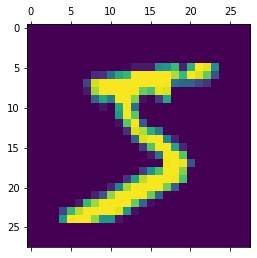

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4674 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3039 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9211
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9231
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9258


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2715 - accuracy: 0.9241


[0.2715221047401428, 0.9240999817848206]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.08330452e-02, 4.72181569e-07, 6.86817616e-02, 9.77529764e-01,
       2.99767475e-03, 1.28997758e-01, 1.98508360e-06, 9.99828994e-01,
       1.23302005e-01, 6.56448185e-01], dtype=float32)

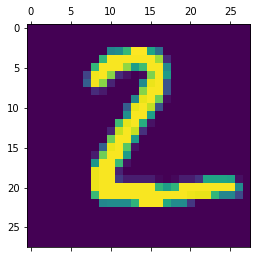

In [19]:
plt.matshow(X_test[1])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [20]:
np.argmax(y_predicted[1])

2

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    0,    3,    0,    4,    8,    2,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,   12,  902,   25,    8,    5,   13,   12,   47,    2],
       [   3,    0,   13,  939,    0,   16,    3,   11,   19,    6],
       [   1,    1,    3,    2,  917,    0,   13,    5,   11,   29],
       [  10,    3,    3,   44,   12,  747,   21,    9,   37,    6],
       [   9,    3,    4,    1,    7,    6,  924,    2,    2,    0],
       [   1,    5,   20,   10,    9,    0,    0,  958,    3,   22],
       [   5,    7,    5,   25,    9,   17,   10,   13,  879,    4],
       [  11,    7,    1,   12,   32,    5,    0,   31,    7,  903]])>

Text(69.0, 0.5, 'Truth')

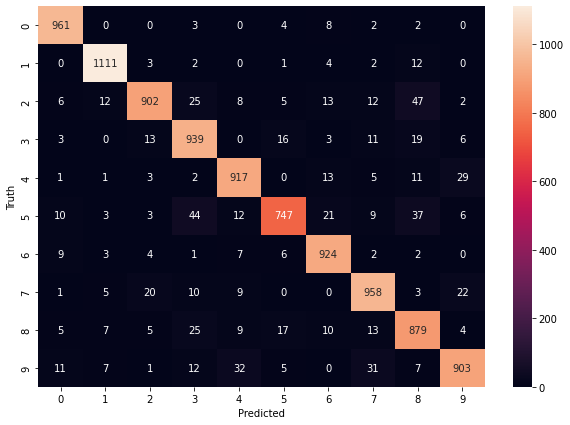

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [54]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.9191
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1366 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0981 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9768
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0618 - accuracy: 0.9812


In [55]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0966 - accuracy: 0.9716


[0.09658893942832947, 0.9715999960899353]

Text(69.0, 0.5, 'Truth')

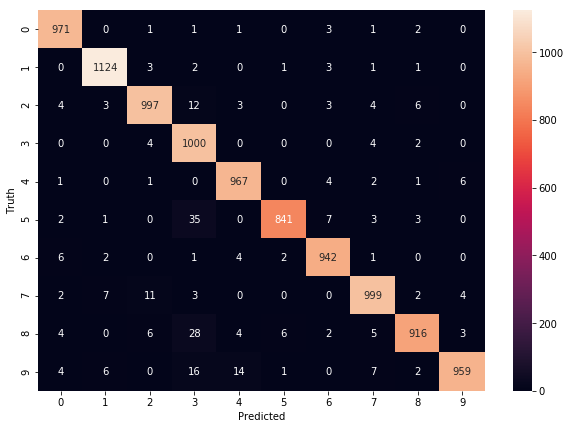

In [56]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2959 - accuracy: 0.9185
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1368 - accuracy: 0.9603
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0995 - accuracy: 0.9703
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0628 - accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0519 - accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0442 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.026

In [60]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0813 - accuracy: 0.9779


[0.08133944123983383, 0.9779000282287598]